# Anomaly detection on host CPU utilizatization.

# AutoRegressive Integrated Moving Average (ARIMA)
this is time series forecasting technique for analyzing and predicting data points that are collected at regular intervals over time.

Following example performs anomaly detection on per-minute metrics of a host’s CPU utilization.

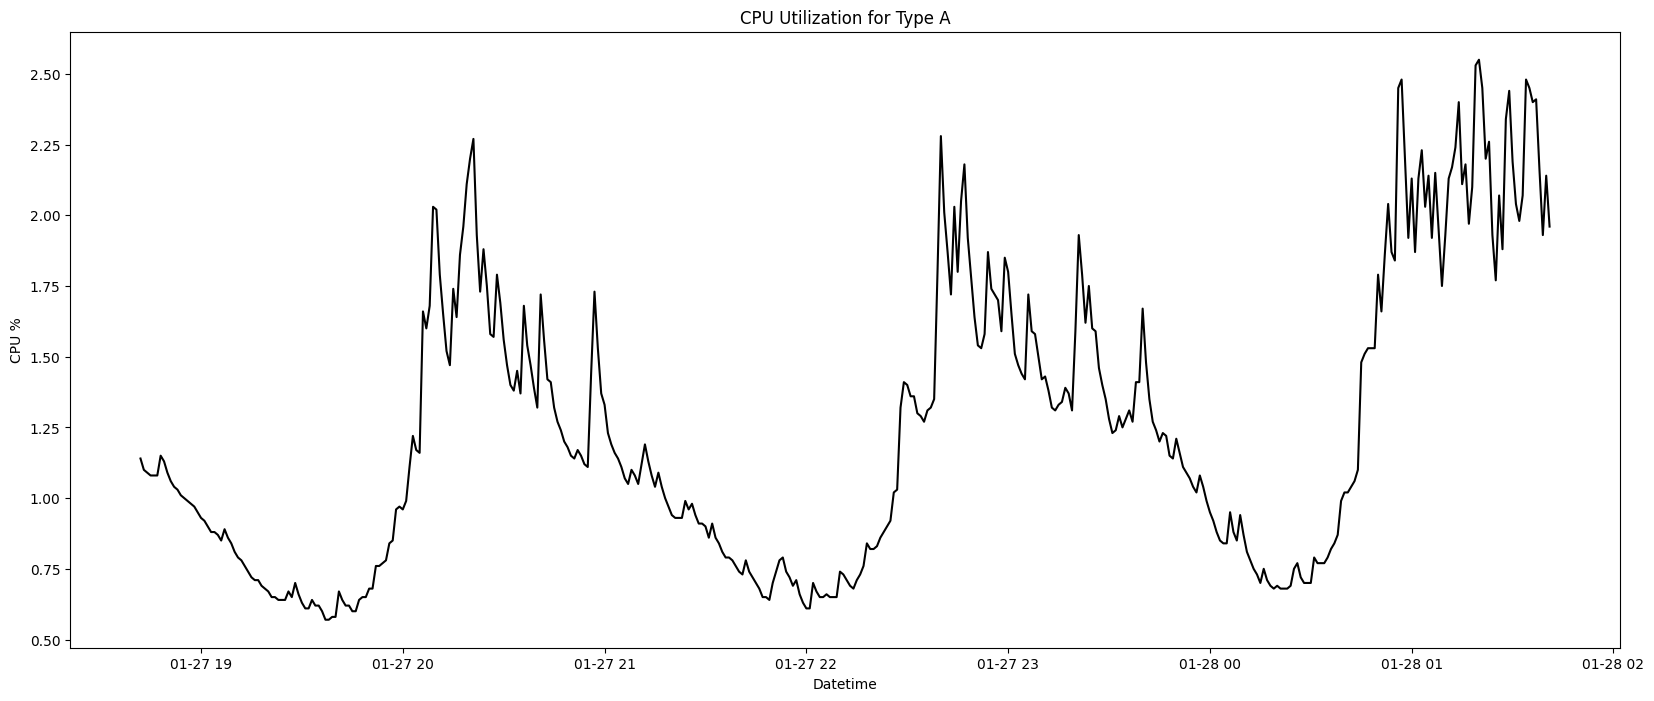

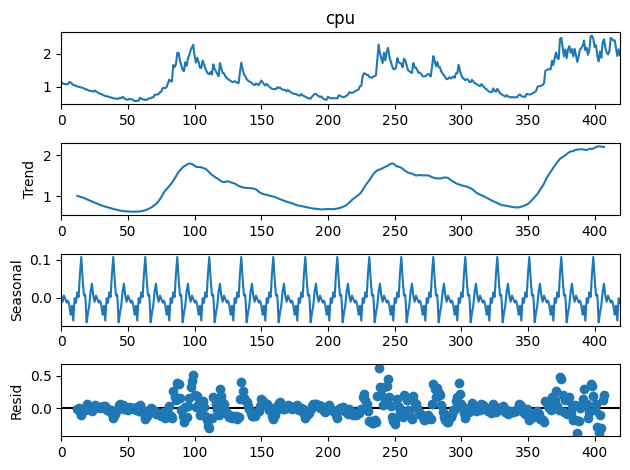

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

# Dataset URLs
dataset_root = 'https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/'
data_files = {
    'a': {
        'full': 'cpu-full-a.csv',
        'train': 'cpu-train-a.csv',
        'test': 'cpu-test-a.csv'
    },
    'b': {
        'full': 'cpu-full-b.csv',
        'train': 'cpu-train-b.csv',
        'test': 'cpu-test-b.csv'
    }
}

# Function to load dataset
def load_dataset(data_type):
    data_full = pd.read_csv(os.path.join(dataset_root, data_files[data_type]['full']), parse_dates=[0], infer_datetime_format=True)
    data_train = pd.read_csv(os.path.join(dataset_root, data_files[data_type]['train']), parse_dates=[0], infer_datetime_format=True)
    data_test = pd.read_csv(os.path.join(dataset_root, data_files[data_type]['test']), parse_dates=[0], infer_datetime_format=True)
    return data_full, data_train, data_test

# Load dataset for type 'a'
data_full_a, data_train_a, data_test_a = load_dataset('a')

# Plot CPU Utilization for type 'a'
plt.figure(figsize=(20, 8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='black')
plt.xlabel('Datetime')
plt.ylabel('CPU %')
plt.title('CPU Utilization for Type A')
plt.show()

# Perform seasonal decomposition (optional)
result = seasonal_decompose(data_train_a['cpu'], model='additive', period=24)
result.plot()
plt.show()


ARIMA forecasting algorithm

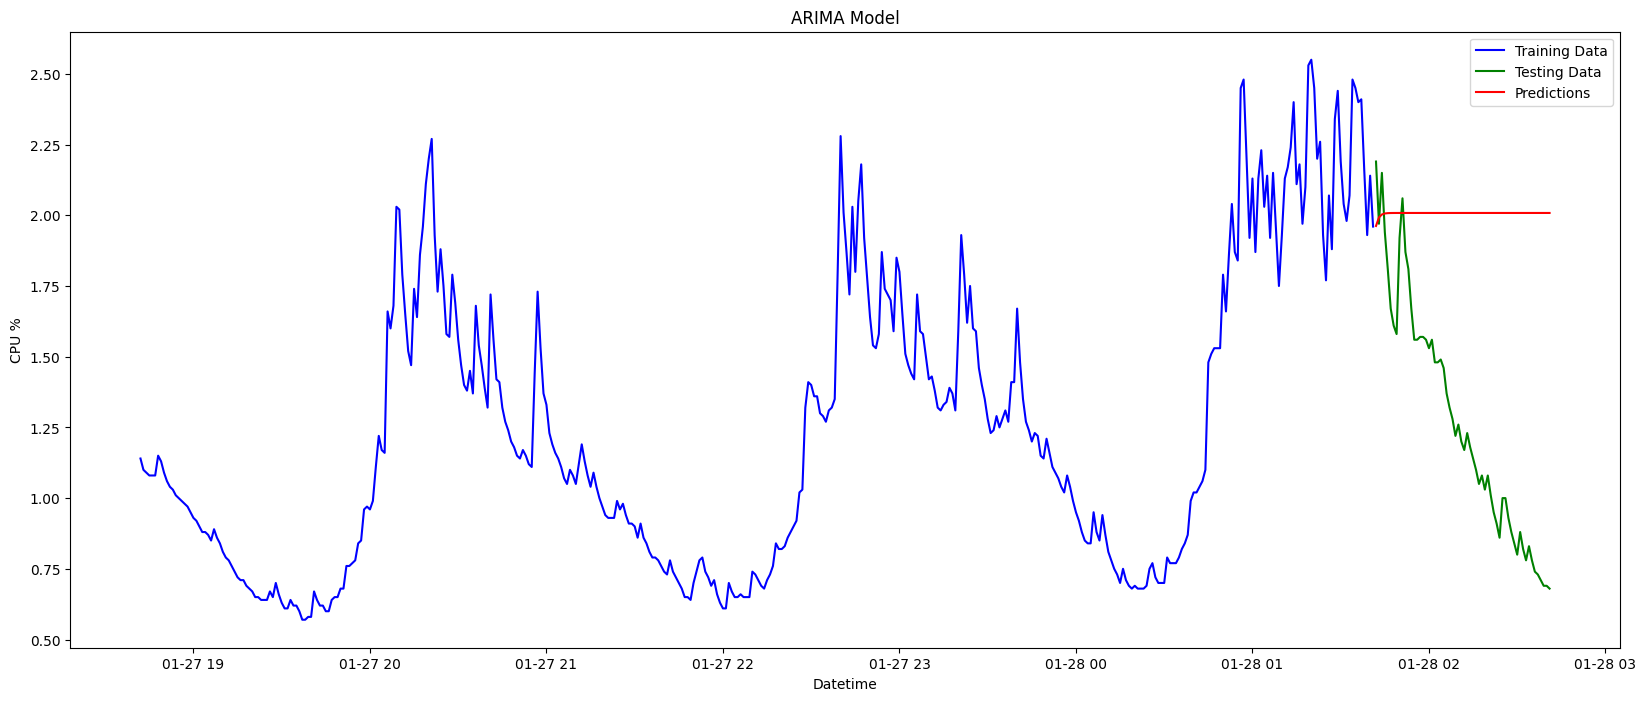

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm

# Dataset root URL
dataset_root = 'https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/'

# Read in the training and testing dataset files
data_train_a = pd.read_csv(os.path.join(dataset_root, 'cpu-train-a.csv'), parse_dates=[0], infer_datetime_format=True)
data_test_a = pd.read_csv(os.path.join(dataset_root, 'cpu-test-a.csv'), parse_dates=[0], infer_datetime_format=True)

# Specify ARIMA model parameters (p, d, q)
p = 11  # Autoregressive order
d = 0   # Differencing order
q = 11  # Moving average order

# Create ARIMA model
model = sm.tsa.arima.ARIMA(data_train_a['cpu'], order=(1,1,2))
model_fit= model.fit()

# Predict using the model
predictions = model_fit.predict(start=len(data_train_a), end=len(data_train_a) + len(data_test_a) - 1, dynamic=False)

# Plot the original data and predictions
plt.figure(figsize=(20, 8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], label='Training Data', color='blue')
plt.plot(data_test_a['datetime'], data_test_a['cpu'], label='Testing Data', color='green')
plt.plot(data_test_a['datetime'], predictions, label='Predictions', color='red')
plt.xlabel('Datetime')
plt.ylabel('CPU %')
plt.title('ARIMA Model')
plt.legend()
plt.show()



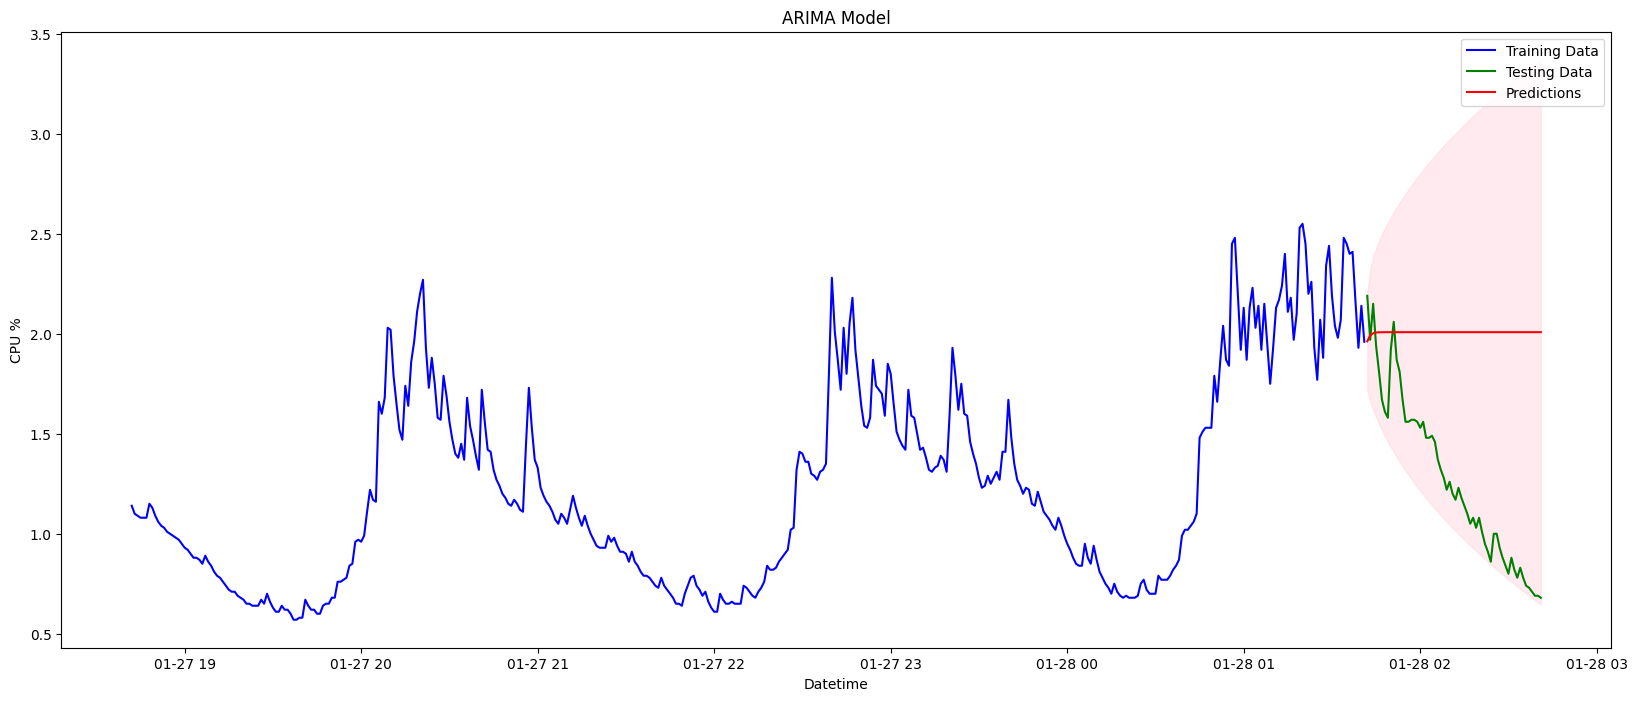

In [19]:
# Predict using the model
predictions = model_fit.get_prediction(start=len(data_train_a), end=len(data_train_a) + len(data_test_a) - 1, dynamic=False)
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot the original data and predictions
plt.figure(figsize=(20, 8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], label='Training Data', color='blue')
plt.plot(data_test_a['datetime'], da data_test_a['cpu'], label='Testing Data', color='green')
plt.plot(data_test_a['datetime'], predicted_mean, label='Predictions', color='red')
plt.fill_between(data_test_a['datetime'], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Datetime')
plt.ylabel('CPU %')
plt.title('ARIMA Model')
plt.legend()
plt.show()